In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [1]:
from ucimlrepo import fetch_ucirepo

In [2]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45)

In [23]:
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets

In [24]:
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [4]:
# metadata 
print(heart_disease.metadata)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [5]:
# variable information 
print(heart_disease.variables) 

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [17]:
target= pd.DataFrame(y)
target.head()

,num
0,0
1,2
2,1
3,0
4,0


In [21]:
df= pd.DataFrame(X)
df['num'] = target
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


In [28]:
df['num'] = df['num'].apply(lambda x: 1 if x > 1 else x)                 # no particular info is goven about 2, 3 and 4 in num.

## <span style="color:orange; font-weight: bold">Some Features Explained:
*   <span style="color:lime; font-weight: bold">cp: </span> chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)

*   <span style="color:lime; font-weight: bold">trestbps: </span>resting blood pressure (on admission to the hospital)

*   <span style="color:lime; font-weight: bold">chol: </span>serum cholestoral   

*   <span style="color:lime; font-weight: bold">fbs: </span>fasting blood sugar > 120 mg/dl

*   <span style="color:lime; font-weight: bold">restecg: </span>resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality,  2: showing probable or definite left ventricular hypertrophy by Estes' criteria)

*   <span style="color:lime; font-weight: bold">thalach: </span>maximum heart rate achieved

*   <span style="color:lime; font-weight: bold">exang: </span>exercise induced angina

*   <span style="color:lime; font-weight: bold">oldpeak: </span>ST depression induced by exercise relative to rest

*   <span style="color:lime; font-weight: bold">slope: </span>the slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping)

*   <span style="color:lime; font-weight: bold">ca: </span>number of major vessels (0-3) colored by flourosopy

*   <span style="color:lime; font-weight: bold">thal: </span>(3 = normal; 6 = fixed defect; 7 = reversable defect)

*   <span style="color:lime; font-weight: bold">num: </span>diagnosis of heart disease (angiographic disease status)   


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [31]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.127389,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.380936,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233214,0.265246,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.133554,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.014214,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.071358,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.024531,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.279631,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.329680,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.341004,0.424510


<Axes: >

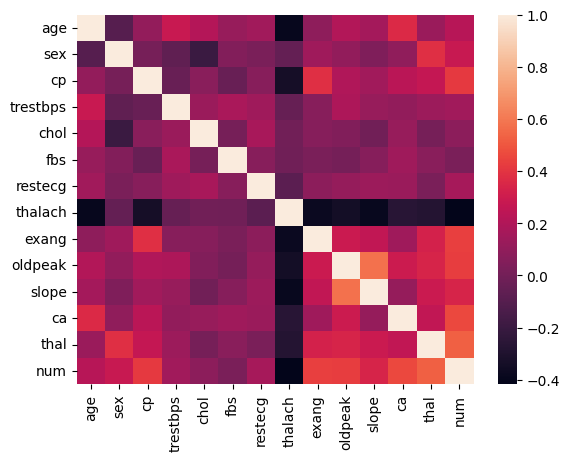

In [32]:
sns.heatmap(df.corr())

## <span style="color:orange"> Observations: </span>
-   num(target) has high +ve correlation with thal, ca, oldpeak, exang and cp.
-   num(target) has high -ve correlation with thalach.
-   rest of the fields have low-moderate correlation.

# Visualizations

<Axes: xlabel='num', ylabel='count'>

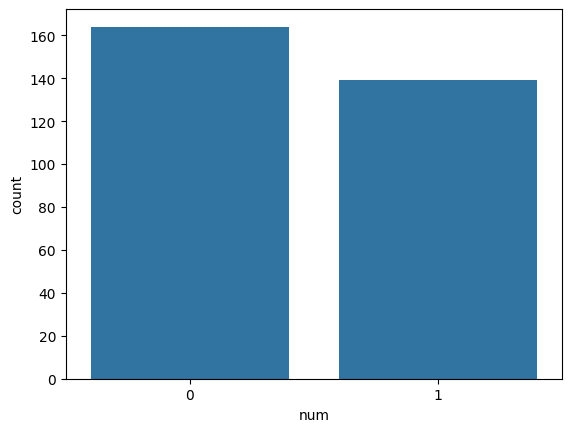

In [33]:
sns.countplot(x='num', data=df)

<Axes: xlabel='age', ylabel='Count'>

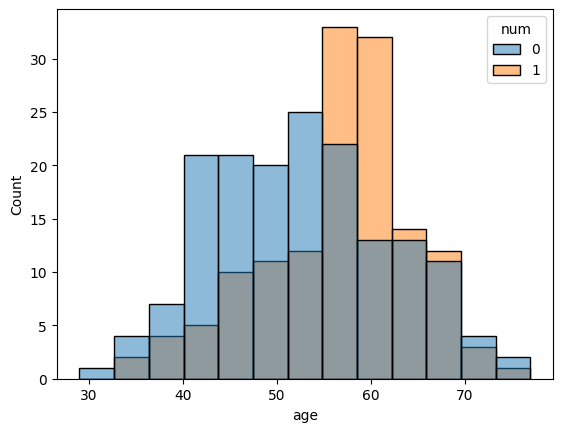

In [36]:
sns.histplot(x='age', data=df, hue='num')

## <span style="color:orange"> Observations: </span>
-   Low Chances of Heart Disease for age b/w 30-55, but not 0 so be careful.
-   High Chances of Heart Dissease for older age 55-65. 
-   About 50-50 Changes amoung 65+ might also be because of low no of data points.

In [37]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [38]:
df.dropna(axis=0, inplace=True)
df.shape

(297, 14)

In [39]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

print(X.head())
print(y.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  
0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int64


In [40]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
lr= LogisticRegression()

lr.fit(X_train, y_train)

y_pred_lr= lr.predict(X_test)

print(accuracy_score(y_test, y_pred_lr))
print("\n******************\n")
print(confusion_matrix(y_test, y_pred_lr))
print("\n******************\n")
print(classification_report(y_test, y_pred_lr))

0.8666666666666667

******************

[[44  5]
 [ 7 34]]

******************

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        49
           1       0.87      0.83      0.85        41

    accuracy                           0.87        90
   macro avg       0.87      0.86      0.86        90
weighted avg       0.87      0.87      0.87        90



In [44]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
dt= DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_dt= dt.predict(X_test)

print(accuracy_score(y_test, y_pred_dt))
print("\n******************\n")
print(confusion_matrix(y_test, y_pred_dt))
print("\n******************\n")
print(classification_report(y_test, y_pred_dt))

0.7111111111111111

******************

[[35 14]
 [12 29]]

******************

              precision    recall  f1-score   support

           0       0.74      0.71      0.73        49
           1       0.67      0.71      0.69        41

    accuracy                           0.71        90
   macro avg       0.71      0.71      0.71        90
weighted avg       0.71      0.71      0.71        90



In [46]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf= RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_rf= rf.predict(X_test)

print(accuracy_score(y_test, y_pred_rf))
print("\n******************\n")
print(confusion_matrix(y_test, y_pred_rf))
print("\n******************\n")
print(classification_report(y_test, y_pred_rf))

0.8666666666666667

******************

[[44  5]
 [ 7 34]]

******************

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        49
           1       0.87      0.83      0.85        41

    accuracy                           0.87        90
   macro avg       0.87      0.86      0.86        90
weighted avg       0.87      0.87      0.87        90



<Axes: >

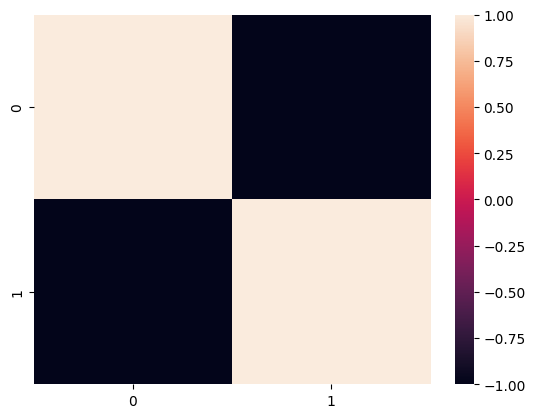

In [50]:
sns.heatmap(np.corrcoef(confusion_matrix(y_test, y_pred_lr)))

<Axes: >

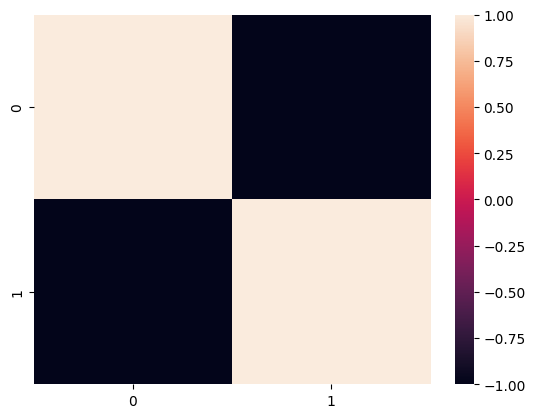

In [52]:
sns.heatmap(np.corrcoef(confusion_matrix(y_test, y_pred_dt)))

<Axes: >

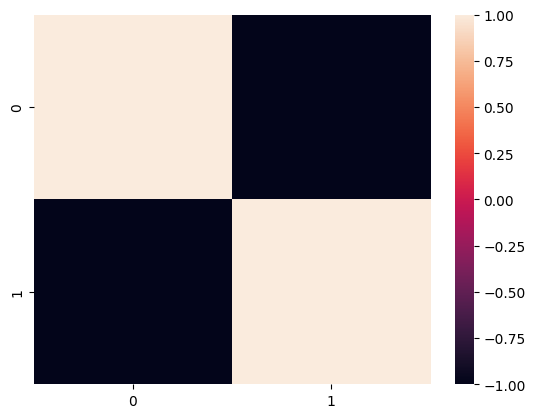

In [51]:
sns.heatmap(np.corrcoef(confusion_matrix(y_test, y_pred_rf)))

In [ ]:
# Best Models- Logistic Reg, Random Forest